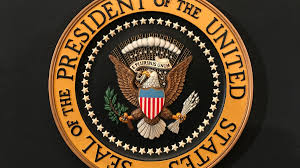

<p style="text-align: center; font-size: 30px;"><b>Presidential Vocabulary</b></p>

<p style="font-size: 16px;"><b>Introduction</b></p>
U.S.A. Presidential Vocabulary  
Whenever a United States of America president is elected or re-elected, an inauguration ceremony takes place to mark the beginning of the president’s term. During the ceremony, the president gives an inaugural address to the nation, dictating the tone and focus of the next four years of leadership.

In this project you will have the chance to analyze the inaugural addresses of the presidents of the United States of America, as collected by the Natural Language Toolkit, using word embeddings.

By training sets of word embeddings on subsets of inaugural address versus the collection of presidents as a whole, we can learn about the different ways in which the presidents use language to convey their agenda.

Let’s get started!


# Preprocessing the Data

<p style="font-size: 16px;"><b>Task 1</b></p>
Provided in the workspace are .txt files for each of the 58 U.S.A. presidential inaugural addresses from 1789 to 2017. The files are named with the following convention:

YEAR-PRESIDENT.txt

where YEAR is the year the inaugural address was given and PRESIDENT is the name of the president who gave the address. If there is only one president with a given last name, only the last name is used. For presidents with the same last name, first name and middle initial(s), separated by a -, are included.

Open the file navigator and click on a few of the files to view them.


<p style="font-size: 16px;"><b>Task 2</b></p>
Navigate back to script.py. At the top of the file we have imported some libraries that will be helpful for your analysis, as well as some helper functions from the file president_helper.py.

In order to create word embeddings on the corpus of all the presidents’ speeches, we need to read the text data from each file, separate the files into sentences on a word by word basis, and then merge all the sentences across the speeches into one big list of lists.

Let’s start by finding all the file names for the .txt files we will be analyzing. Paste the following code into script.py to store a list of all .txt files in a variable files.

files = sorted([file for file in os.listdir() if file[-4:] == '.txt'])

Print files to view the names of each inauguration speech file.


In [1]:
import os
import gensim
import spacy
from president_folder.president_helper import read_file, process_speeches, merge_speeches, get_president_sentences, get_presidents_sentences, most_frequent_words

In [2]:
files = sorted([
    file for file in os.listdir("president_folder") 
    if file.endswith(".txt")
])

In [3]:
files

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-John-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-John-Q-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-William-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Benjamin-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Theodore-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Franklin-D-Roosevelt.txt',
 '1937-Franklin-D-Roosevelt.txt',
 '1941-Franklin-D-Roosevelt.txt',
 '1945-Franklin-D-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 

<p style="font-size: 16px;"><b>Task 3</b></p>
Imported from president_helper.py is a function called read_file() which takes a file name as an argument and returns the opened file as one big string.

Call read_file() on each file in files, and save all the resulting string versions to a list named speeches.


In [5]:
speeches = []

for speech in files:
    speeches.append(read_file(speech))

<p style="font-size: 16px;"><b>Task 4</b></p>
Now that we have a list of speeches as strings, we need to breakdown the speeches into words on a sentence-by-sentence basis.

For example, if we have the following sentences:

"The cat in the hat is sad. He didn't have a mouse."

The processed data would look as follows:

[["the","cat","in","the","hat","is","sad"], ["he","didn't","have","a","mouse"]]

We’ve imported the function process_speeches() from president_helper.py in order to perform this preprocessing for you. The function takes a list of strings as an argument and returns a list of lists. Each inner list represents one inaugural address and is a list of lists as well. Each inner list of the inaugural address list represents a sentence of that address, and each item in the sentence list is a word token in that sentence.

Call process_speeches() with speeches as an argument and save the resulting list to processed_speeches.


In [6]:
processed_speeches = process_speeches(speeches)

In [7]:
processed_speeches[0][0]

['fellow',
 'citizens',
 'of',
 'the',
 'senate',
 'and',
 'of',
 'the',
 'house',
 'of',
 'representatives',
 'among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month']

<p style="font-size: 16px;"><b>Task 5</b></p>
In order to build a custom set of word embeddings using gensim, we need to convert our data into a list of lists, where each inner list is a sentence and each item in the inner list is a word token.

Currently, our speech data is in the following form:

speeches = [[["monkeys","eat","bananas"],["they","hang","from","trees"],...], [["penguins","are","cute"],["they","cannot","fly"],...],...]

Where we have two speeches, one about monkeys and another about penguins. We want to remove the outer layer of the list so our data is as follows:

speeches = [["monkeys","eat","bananas"],["they","hang","from","trees"],..., ["penguins","are","cute"],["they","cannot","fly"],...]

We’ve imported a function merge_speeches() from president_helper.py that takes a list of all our processed speeches and returns a list of lists where each inner list is a sentence and each item in the inner list is a word token.

Call merge_speeches() on processed_speeches and save the result to all_sentences.

Our data is now processed and ready for some analysis!


In [8]:
all_sentences = merge_speeches(processed_speeches)

In [9]:
all_sentences[0]

['fellow',
 'citizens',
 'of',
 'the',
 'senate',
 'and',
 'of',
 'the',
 'house',
 'of',
 'representatives',
 'among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month']

# All Presidents

<p style="font-size: 16px;"><b>Task 6</b></p>
To get a better understanding of the data, let’s take a look at the most frequently used words across all the inaugural addresses.

Imported from president_helper.py is a function most_frequent_words(), which uses the Counter() function from Python’s collections module to find the most common words in a list of lists, where each item in the inner list is a word token.

Call most_frequent_words() with all_sentences as an argument and save the result to most_freq_words. Print most_freq_words to the terminal.

Once you have taken a look at the list of commonly used words, you can comment out your print statement so your output terminal doesn’t display the words each time you run your code.


In [10]:
most_freq_words = most_frequent_words(all_sentences)

In [11]:
most_freq_words

[('the', 10066),
 ('of', 7102),
 ('and', 5304),
 ('to', 4522),
 ('in', 2779),
 ('a', 2245),
 ('our', 2178),
 ('that', 1787),
 ('we', 1735),
 ('be', 1482),
 ('is', 1459),
 ('it', 1370),
 ('for', 1194),
 ('by', 1083),
 ('have', 1011),
 ('which', 1006),
 ('with', 956),
 ('not', 953),
 ('as', 947),
 ('will', 912),
 ('i', 835),
 ('this', 835),
 ('all', 816),
 ('are', 811),
 ('their', 750),
 ('but', 654),
 ('has', 622),
 ('government', 587),
 ('from', 572),
 ('its', 572),
 ('people', 565),
 ('or', 559),
 ('on', 533),
 ('my', 494),
 ('been', 488),
 ('us', 473),
 ('can', 470),
 ('no', 465),
 ('they', 453),
 ('so', 392),
 ('an', 390),
 ('who', 370),
 ('upon', 370),
 ('must', 366),
 ('at', 347),
 ('great', 339),
 ('may', 338),
 ('those', 327),
 ('should', 324),
 ('them', 321),
 ('states', 317),
 ('more', 313),
 ('shall', 312),
 ('world', 312),
 ('country', 299),
 ('every', 299),
 ('these', 290),
 ('nation', 288),
 ('if', 287),
 ('any', 278),
 ('was', 270),
 ('other', 257),
 ('there', 255),
 ('on

<p style="font-size: 16px;"><b>Task 7</b></p>
Finally, it’s word embedding time! Create a word embedding model with gensim using the following function and keyword arguments:

gensim.models.Word2Vec(__________, size=96, window=5, min_count=1, workers=2, sg=1)

Save the model to a variable named all_prez_embeddings.

Replace the __________ with your variable containing all the inaugural address sentences.


In [12]:
all_prez_embedding = gensim.models.Word2Vec(all_sentences, vector_size=96, window=5, min_count=1, workers=2, sg=1)

<p style="font-size: 16px;"><b>Task 8</b></p>
Now that we have our word embeddings, let’s have some fun exploring them! The concept of “freedom” is prevalent in the speeches made by the presidents. Find the top 20 words that are used in similar contexts to “freedom”, and save the results to a variable named similar_to_freedom.

Print similar_to_freedom to the terminal.

In [13]:
similar_to_freedom = all_prez_embedding.wv.most_similar("freedom", topn = 20)

In [14]:
similar_to_freedom

[('human', 0.9790287613868713),
 ('life', 0.9656084775924683),
 ('independence', 0.965112566947937),
 ('race', 0.9622802734375),
 ('growth', 0.9621778130531311),
 ('parts', 0.9618898034095764),
 ('influence', 0.9615983366966248),
 ('sovereignty', 0.9614236950874329),
 ('political', 0.961190938949585),
 ('individual', 0.9604812264442444),
 ('progress', 0.9601948857307434),
 ('institutions', 0.9601765275001526),
 ('wealth', 0.9594125747680664),
 ('condition', 0.9589004516601562),
 ('international', 0.9580749869346619),
 ('labor', 0.9572212100028992),
 ('capital', 0.956623911857605),
 ('economic', 0.9562158584594727),
 ('values', 0.956114649772644),
 ('increase', 0.9557397961616516)]

<p style="font-size: 16px;"><b>Task 9</b></p>
What other words in the corpus of inaugural addresses do you want to analyze? Pick a word from most_freq_words and find other words that are used similarly. Are you surprised by the words that are used in the same contexts?

In [15]:
similar_to_government = all_prez_embedding.wv.most_similar("government", topn = 20)
similar_to_government

[('federal', 0.9478332996368408),
 ('form', 0.9437563419342041),
 ('self', 0.9366990923881531),
 ('itself', 0.9364559650421143),
 ('general', 0.9351914525032043),
 ('authority', 0.9289498925209045),
 ('local', 0.928636372089386),
 ('body', 0.9255656003952026),
 ('union', 0.9248703122138977),
 ('action', 0.9225293397903442),
 ('system', 0.9224970936775208),
 ('law', 0.9210173487663269),
 ('independent', 0.9210107326507568),
 ('instrument', 0.9199007749557495),
 ('separate', 0.9192928075790405),
 ('control', 0.919183075428009),
 ('powers', 0.9181461334228516),
 ('legislative', 0.9176887273788452),
 ('influence', 0.9159910082817078),
 ('executive', 0.9158968329429626)]

In [16]:
similar_to_world = all_prez_embedding.wv.most_similar("world", topn = 20)
similar_to_world

[('war', 0.9455342292785645),
 ('mankind', 0.9448783993721008),
 ('itself', 0.9403567314147949),
 ('throughout', 0.94024658203125),
 ('body', 0.9400526285171509),
 ('executive', 0.9397756457328796),
 ('great', 0.9391014575958252),
 ('community', 0.9388318657875061),
 ('earth', 0.9381490349769592),
 ('department', 0.9377994537353516),
 ('greatest', 0.937584400177002),
 ('land', 0.9369941353797913),
 ('spirit', 0.9358980655670166),
 ('parties', 0.9358605146408081),
 ('policy', 0.9343065023422241),
 ('century', 0.9332603216171265),
 ('legislative', 0.9322875738143921),
 ('confederacy', 0.9321478605270386),
 ('courage', 0.9319740533828735),
 ("world's", 0.9314006567001343)]

In [17]:
similar_to_country = all_prez_embedding.wv.most_similar("country", topn = 20)
similar_to_country

[('confidence', 0.9426256418228149),
 ('hands', 0.9402526021003723),
 ('part', 0.9372311234474182),
 ('portion', 0.937145471572876),
 ('citizen', 0.9327659010887146),
 ('service', 0.9302533864974976),
 ('welfare', 0.9300488233566284),
 ('family', 0.9300174117088318),
 ('sense', 0.9293904900550842),
 ('destiny', 0.9287183880805969),
 ('place', 0.9273616671562195),
 ('aid', 0.9251893758773804),
 ('honor', 0.9226745963096619),
 ('full', 0.9223300814628601),
 ('condition', 0.9220580458641052),
 ('heart', 0.9216588735580444),
 ('strength', 0.9216229915618896),
 ('voice', 0.9211440086364746),
 ('regard', 0.9210159182548523),
 ('land', 0.9205856323242188)]

# One President

<p style="font-size: 16px;"><b>Task 10</b></p>
A fun aspect of word embeddings is to see how different corpora result in different word embeddings, alluding to differences in how words are used between writers/authors/speakers.

Let’s train a word embedding model on a single president and see how their word embeddings differ from the collection of all presidents.

Provided in script.py is a function get_president_sentences() that takes a president’s name as a string argument and returns a list of processed sentences from every inaugural address given by the president.

Call get_president_sentences() with "franklin-d-roosevelt" as an argument and save the result to roosevelt_sentences.


In [18]:
roosevelt_sentences = get_president_sentences("franklin-d-roosevelt")

In [19]:
len(roosevelt_sentences)

277

<p style="font-size: 16px;"><b>Task 11</b></p>
To get a better understanding of President Franklin D. Roosevelt’s speeches, let’s take a look at the most frequently used words across his inaugural addresses.

Call most_frequent_words() with roosevelt_sentences as an argument and save the result to roosevelt_most_freq_words. Print roosevelt_most_freq_words to the terminal.

Once you have taken a look at the list of the commonly used words, you can comment out your print statement so your output terminal doesn’t display the words each time you run your code.


In [20]:
roosevelt_most_freq_words = most_frequent_words(roosevelt_sentences)

In [21]:
roosevelt_most_freq_words

[('the', 375),
 ('of', 321),
 ('and', 179),
 ('to', 158),
 ('we', 131),
 ('a', 121),
 ('in', 119),
 ('that', 102),
 ('our', 90),
 ('it', 71),
 ('is', 67),
 ('have', 56),
 ('for', 47),
 ('be', 41),
 ('i', 40),
 ('this', 40),
 ('not', 40),
 ('by', 38),
 ('will', 35),
 ('as', 33),
 ('all', 33),
 ('are', 32),
 ('which', 29),
 ('with', 28),
 ('on', 27),
 ('has', 27),
 ('they', 27),
 ('but', 27),
 ('nation', 26),
 ('people', 25),
 ('their', 25),
 ('government', 23),
 ('can', 23),
 ('us', 20),
 ('shall', 20),
 ('democracy', 20),
 ('from', 19),
 ('an', 19),
 ('men', 18),
 ('its', 18),
 ('must', 17),
 ('who', 17),
 ('been', 16),
 ('know', 16),
 ('life', 15),
 ('spirit', 15),
 ('no', 15),
 ('because', 15),
 ('there', 15),
 ('if', 15),
 ('so', 14),
 ('at', 14),
 ('more', 13),
 ('those', 13),
 ('upon', 13),
 ('national', 12),
 ('years', 12),
 ('may', 12),
 ('new', 12),
 ('world', 12),
 ('my', 11),
 ('every', 11),
 ('these', 11),
 ('through', 11),
 ('states', 11),
 ('way', 11),
 ('good', 11),
 ('or

<p style="font-size: 16px;"><b>Task 12</b></p>
Now that we have the sentences from President Roosevelt’s speeches, create another word embedding model with gensim, using the same keyword arguments as in the earlier word embedding model you created, trained on just the inaugural address sentences for President Roosevelt. Save the embeddings to a variable named roosevelt_embeddings.

In [22]:
roosevelt_embeddings = gensim.models.Word2Vec(roosevelt_sentences, vector_size=96, window=5, min_count=1, workers=2, sg=1)

<p style="font-size: 16px;"><b>Task 13</b></p>
Like with our previous word embedding model, let’s explore roosevelt_embeddings! Find the top 20 words that are used in similar contexts to “freedom”, and save the results to a variable named roosevelt_similar_to_freedom.

Print roosevelt_similar_to_freedom to the terminal.

How do the words similar to “freedom” in President Roosevelt’s embeddings compare to the words similar to “freedom” in the embeddings of all the presidents’ speeches?

Are there any surprises?


In [23]:
roosevelt_similar_to_freedom = roosevelt_embeddings.wv.most_similar("freedom")

In [24]:
roosevelt_similar_to_freedom

[('and', 0.9974622130393982),
 ('all', 0.9969558715820312),
 ('have', 0.9969481229782104),
 ('must', 0.9969378709793091),
 ('in', 0.9967553615570068),
 ('will', 0.996734619140625),
 ('be', 0.9966800212860107),
 ('there', 0.996677577495575),
 ('our', 0.9966691136360168),
 ('no', 0.9966437220573425)]

The results from calling `roosevelt_embeddings.most_similar("freedom", topn=20)` are not very informative — many of the closest words are stop words or very common terms that don’t reveal much about context or meaning. This happens because even for President Roosevelt, who delivered more inaugural addresses than any other president, the amount of text is still too small to generate strong, reliable word embeddings.

In the next section, we will expand the corpus by combining speeches from multiple presidents in order to produce more meaningful embeddings.


# Selection of Presidents

<p style="font-size: 16px;"><b>Task 14</b></p>
You may have noticed that the results from roosevelt_embeddings.most_similar("freedom", topn=20) are less than satisfying. This is because we were working with a limited dataset, producing less robust and generalizable word embeddings.

Let’s increase our corpus size and find more defined word embeddings by training a word embedding model on the inaugural addresses of a collection of multiple presidents.

Provided in script.py is a function get_presidents_sentences() that takes a list of multiple presidents’ names as an argument and returns a list of processed sentences from every inaugural address given by the group of presidents.

Call get_presidents_sentences() with ["washington","jefferson","lincoln","theodore-roosevelt"] as an argument and save the result to rushmore_prez_sentences.


In [25]:
rushmore_prez_sentences =  get_presidents_sentences(["washington","jefferson","lincoln","theodore-roosevelt"])

<p style="font-size: 16px;"><b>Task 15</b></p>
To get a better understanding of President Washington, Jefferson, Lincoln, and Theodore Roosevelt’s speeches, let’s take a look at the most frequently used words across their inaugural addresses.

Call most_frequent_words() with rushmore_prez_sentences as an argument and save the result to rushmore_most_freq_words. Print rushmore_most_freq_words to the terminal.

Once you have taken a look at the list of the commonly used words, you can comment out your print statement so your output terminal doesn’t display the words each time you run your code.


In [26]:
rushmore_most_freq_words = most_frequent_words(rushmore_prez_sentences)

In [27]:
rushmore_most_freq_words

[('the', 779),
 ('of', 500),
 ('and', 391),
 ('to', 385),
 ('in', 202),
 ('that', 163),
 ('be', 155),
 ('a', 138),
 ('which', 128),
 ('it', 124),
 ('by', 115),
 ('i', 113),
 ('is', 109),
 ('with', 99),
 ('as', 87),
 ('all', 85),
 ('our', 85),
 ('have', 84),
 ('not', 84),
 ('we', 72),
 ('this', 70),
 ('for', 68),
 ('will', 67),
 ('on', 59),
 ('no', 57),
 ('or', 57),
 ('from', 56),
 ('their', 55),
 ('but', 53),
 ('them', 51),
 ('are', 50),
 ('my', 49),
 ('can', 48),
 ('government', 46),
 ('they', 45),
 ('shall', 42),
 ('its', 41),
 ('may', 41),
 ('who', 38),
 ('any', 38),
 ('you', 37),
 ('so', 35),
 ('constitution', 34),
 ('if', 33),
 ('people', 33),
 ('us', 32),
 ('has', 31),
 ('citizens', 30),
 ('union', 29),
 ('one', 28),
 ('an', 28),
 ('public', 28),
 ('should', 28),
 ('me', 27),
 ('these', 27),
 ('there', 27),
 ('than', 26),
 ('been', 26),
 ('now', 26),
 ('your', 25),
 ('other', 25),
 ('his', 25),
 ('own', 25),
 ('would', 25),
 ('those', 25),
 ('must', 25),
 ('every', 24),
 ('such',

<p style="font-size: 16px;"><b>Task 16</b></p>
Now that we have the sentences from the presidents featured on Mount Rushmore, create another word embedding model with gensim, using the same keyword arguments as in the earlier word embedding model you created, trained on just the inaugural address sentences for these presidents. Save the embeddings to a variable named rushmore_embeddings.

In [28]:
rushmore_embeddings = gensim.models.Word2Vec(rushmore_prez_sentences, vector_size=96, window=5, min_count=1, workers=2, sg=1)

<p style="font-size: 16px;"><b>Task 17</b></p>
Like with our previous word embedding models, let’s explore rushmore_embeddings! Find words that are used in similar contexts to “freedom”, and save the results to a variable named rushmore_similar_to_freedom.

How do the words similar to “freedom” in these presidents’ embeddings compare to the words similar to “freedom” in the embeddings of all the presidents’ speeches? And to just Franklin D Roosevelt’s?

Are there any surprises?

In [29]:
rushmore_similar_to_freedom = rushmore_embeddings.wv.most_similar("freedom")

In [30]:
rushmore_similar_to_freedom

[('was', 0.9978967308998108),
 ('and', 0.997852623462677),
 ('time', 0.9978059530258179),
 ('which', 0.997761070728302),
 ('only', 0.9977301955223083),
 ('while', 0.9976431131362915),
 ('him', 0.9976162910461426),
 ('would', 0.9976062178611755),
 ('against', 0.9975961446762085),
 ('country', 0.9975761771202087)]

<p style="font-size: 16px;"><b>Task 18</b></p>
What other words in the corpus of Mount Rushmore presidents’ inaugural addresses do you want to analyze? Pick a word from rushmore_most_freq_words and find other words that are used similarly. Are you surprised by the words that are used in the same contexts?


In [31]:
rushmore_similar_to_world = rushmore_embeddings.wv.most_similar("world", topn = 20)
rushmore_similar_to_world

[('so', 0.9985098838806152),
 ('it', 0.9983110427856445),
 ('only', 0.9982937574386597),
 ('this', 0.9982908368110657),
 ('upon', 0.9982807636260986),
 ('would', 0.9982782006263733),
 ('right', 0.998261570930481),
 ('he', 0.9982504844665527),
 ('them', 0.9982297420501709),
 ('national', 0.9982263445854187),
 ('every', 0.9982243776321411),
 ('less', 0.9982003569602966),
 ('for', 0.9981880187988281),
 ('from', 0.9981766939163208),
 ('good', 0.9981660842895508),
 ('what', 0.9981642961502075),
 ('without', 0.9981603026390076),
 ('if', 0.9981579780578613),
 ('war', 0.9981464147567749),
 ('first', 0.9981459975242615)]

In [32]:
rushmore_similar_to_country = rushmore_embeddings.wv.most_similar("country", topn = 20)
rushmore_similar_to_country

[('at', 0.9987086057662964),
 ('still', 0.9986292719841003),
 ('without', 0.9985811710357666),
 ('war', 0.9985727071762085),
 ('but', 0.9985674619674683),
 ('great', 0.9984961748123169),
 ('which', 0.9984940886497498),
 ('among', 0.998474657535553),
 ('shall', 0.9984595775604248),
 ('only', 0.9984509348869324),
 ('from', 0.9984504580497742),
 ('do', 0.9984477162361145),
 ('union', 0.9984463453292847),
 ('against', 0.9984375834465027),
 ('when', 0.9984345436096191),
 ('they', 0.9983875751495361),
 ('we', 0.9983826875686646),
 ('their', 0.998382568359375),
 ('while', 0.9983810782432556),
 ('was', 0.9983806014060974)]

# Final Remarks

By exploring inaugural addresses through word embeddings, you’ve seen how language patterns shift depending on the size and composition of the corpus. Larger, more diverse sets of speeches produced clearer semantic relationships, while smaller corpora — such as those from a single president — yielded less informative embeddings due to limited context.

Through comparing embeddings from all presidents, from Roosevelt alone, and from the Mount Rushmore presidents, you also gained insight into how different leaders emphasize themes like *freedom* and how their linguistic choices differ.

This project demonstrates the power of word embeddings for historical and political text analysis, and opens the door for deeper explorations — such as comparing eras, political parties, or recurring themes across centuries of U.S. presidential rhetoric.

---
